# Génération et visualisation de graphes k-NN et epsilon
Ce notebook montre comment générer et visualiser des graphes k-NN et epsilon à partir de données synthétiques (points dans le plan).

## 1. Importer les bibliothèques nécessaires
Nous allons utiliser numpy, matplotlib, scikit-learn et networkx pour générer et visualiser les graphes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import networkx as nx

## 2. Générer des données synthétiques pour les images
Créons un nuage de points aléatoires dans le plan pour simuler des données d'images.

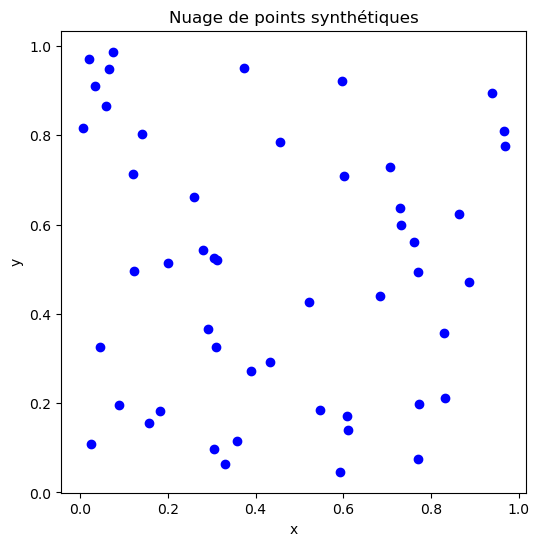

In [2]:
# Générer N points aléatoires dans le plan
N = 50
np.random.seed(42)
X = np.random.rand(N, 2)
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c='blue')
plt.title('Nuage de points synthétiques')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 3. Construire le graphe k-NN
Utilisons scikit-learn pour calculer les k plus proches voisins et construire le graphe k-NN avec networkx.

In [3]:
k = 5
knn = NearestNeighbors(n_neighbors=k+1)
knn.fit(X)
distances, indices = knn.kneighbors(X)
G_knn = nx.Graph()
for i in range(N):
    for j in indices[i][1:]:  # ignorer le point lui-même
        G_knn.add_edge(i, j)

## 4. Visualiser le graphe k-NN
Affichons le graphe k-NN en superposant les arêtes sur les points de données.

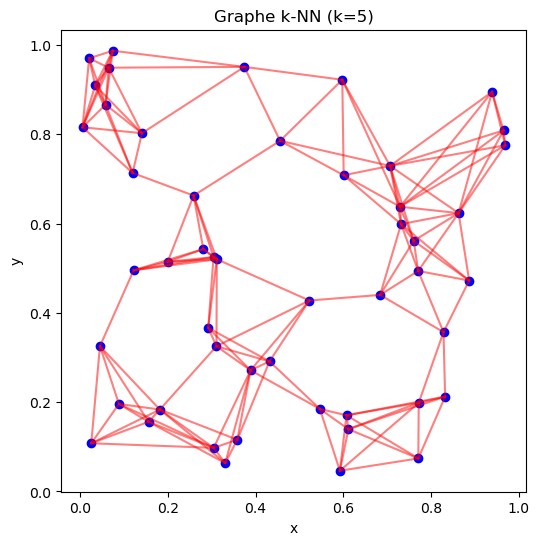

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c='blue')
for edge in G_knn.edges():
    x0, y0 = X[edge[0]]
    x1, y1 = X[edge[1]]
    plt.plot([x0, x1], [y0, y1], 'r-', alpha=0.5)
plt.title('Graphe k-NN (k={})'.format(k))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 5. Construire le graphe epsilon
Connectons les points dont la distance est inférieure à un seuil epsilon.

In [5]:
epsilon = 0.2
G_epsilon = nx.Graph()
for i in range(N):
    for j in range(i+1, N):
        dist = np.linalg.norm(X[i] - X[j])
        if dist < epsilon:
            G_epsilon.add_edge(i, j)

## 6. Visualiser le graphe epsilon
Affichons le graphe epsilon en superposant les arêtes sur les points de données.

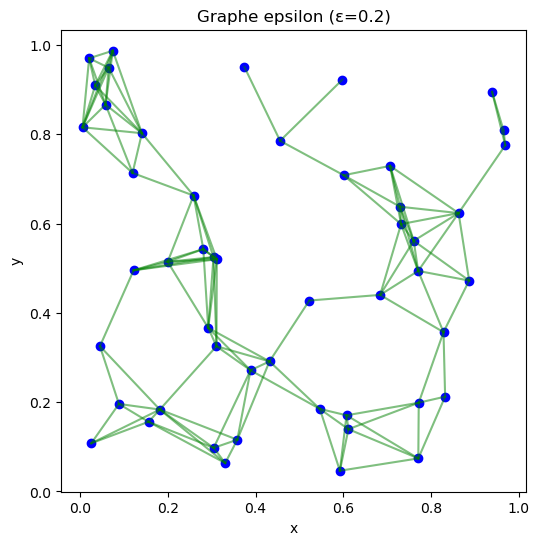

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c='blue')
for edge in G_epsilon.edges():
    x0, y0 = X[edge[0]]
    x1, y1 = X[edge[1]]
    plt.plot([x0, x1], [y0, y1], 'g-', alpha=0.5)
plt.title('Graphe epsilon (ε={})'.format(epsilon))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 7. Visualiser les deux graphes côte à côte et le cercle epsilon
Affichons les graphes k-NN et epsilon côte à côte, et ajoutons le cercle epsilon en pointillé autour d'un point choisi.

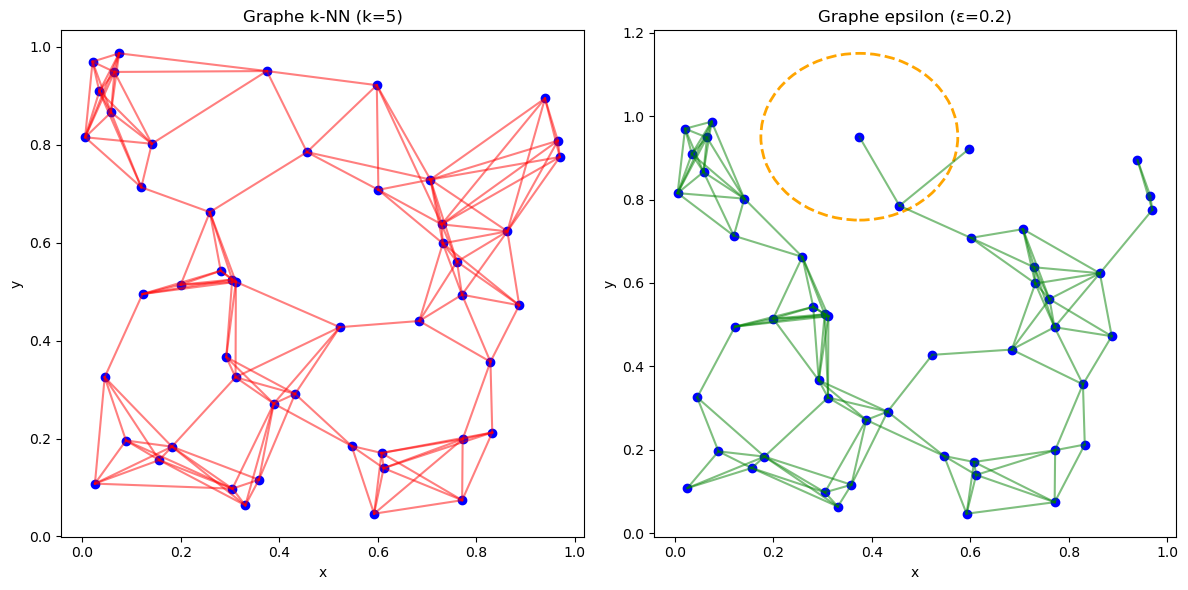

In [7]:
import matplotlib.patches as patches
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# k-NN graph
axes[0].scatter(X[:,0], X[:,1], c='blue')
for edge in G_knn.edges():
    x0, y0 = X[edge[0]]
    x1, y1 = X[edge[1]]
    axes[0].plot([x0, x1], [y0, y1], 'r-', alpha=0.5)
axes[0].set_title('Graphe k-NN (k={})'.format(k))
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
# epsilon graph
axes[1].scatter(X[:,0], X[:,1], c='blue')
for edge in G_epsilon.edges():
    x0, y0 = X[edge[0]]
    x1, y1 = X[edge[1]]
    axes[1].plot([x0, x1], [y0, y1], 'g-', alpha=0.5)
# Ajout du cercle epsilon autour du premier point
center = X[0]
circle = patches.Circle(center, epsilon, edgecolor='orange', facecolor='none', linestyle='dashed', linewidth=2)
axes[1].add_patch(circle)
axes[1].set_title('Graphe epsilon (ε={})'.format(epsilon))
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
plt.tight_layout()
plt.show()

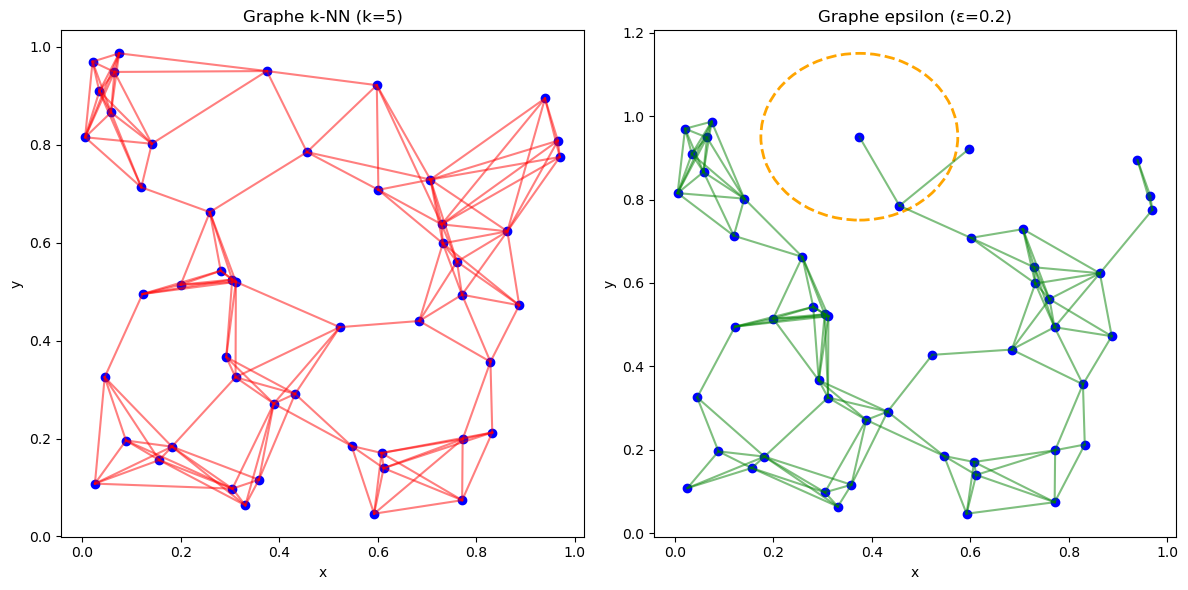

In [8]:
# Sauvegarde du résultat dans un fichier PNG
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(X[:,0], X[:,1], c='blue')
for edge in G_knn.edges():
    x0, y0 = X[edge[0]]
    x1, y1 = X[edge[1]]
    axes[0].plot([x0, x1], [y0, y1], 'r-', alpha=0.5)
axes[0].set_title('Graphe k-NN (k={})'.format(k))
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[1].scatter(X[:,0], X[:,1], c='blue')
for edge in G_epsilon.edges():
    x0, y0 = X[edge[0]]
    x1, y1 = X[edge[1]]
    axes[1].plot([x0, x1], [y0, y1], 'g-', alpha=0.5)
center = X[0]
circle = patches.Circle(center, epsilon, edgecolor='orange', facecolor='none', linestyle='dashed', linewidth=2)
axes[1].add_patch(circle)
axes[1].set_title('Graphe epsilon (ε={})'.format(epsilon))
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
plt.tight_layout()
plt.savefig('graphe_knn_epsilon.png', dpi=300)
plt.show()

## 8. Exemple simple de propagation de labels sur le graphe k-NN
Nous allons propager des labels à partir de quelques points étiquetés en utilisant le graphe k-NN.

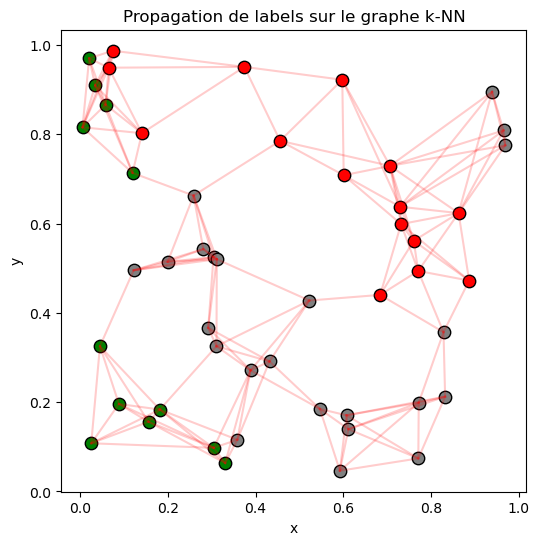

In [9]:
# Création de labels initiaux (2 classes, quelques points étiquetés)
labels = np.full(N, -1)  # -1 = non étiqueté
labels[0] = 0  # classe 0
labels[1] = 0
labels[2] = 1  # classe 1
labels[3] = 1
# Propagation simple par voisinage (1 itération)
new_labels = labels.copy()
for i in range(N):
    if labels[i] == -1:
        voisins = [j for j in G_knn.neighbors(i) if labels[j] != -1]
        if voisins:
            # Prend le label majoritaire parmi les voisins étiquetés
            vals, counts = np.unique(labels[voisins], return_counts=True)
            new_labels[i] = vals[np.argmax(counts)]
labels = new_labels
# Visualisation des labels propagés
plt.figure(figsize=(6,6))
colors = np.array(['red', 'green', 'gray'])
for i in range(N):
    plt.scatter(X[i,0], X[i,1], color=colors[labels[i]], s=80, edgecolor='black')
for edge in G_knn.edges():
    x0, y0 = X[edge[0]]
    x1, y1 = X[edge[1]]
    plt.plot([x0, x1], [y0, y1], 'r-', alpha=0.2)
plt.title('Propagation de labels sur le graphe k-NN')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 9. Visualisation avant et après propagation des labels
Affichons côte à côte les labels initiaux et les labels après propagation sur le graphe k-NN.

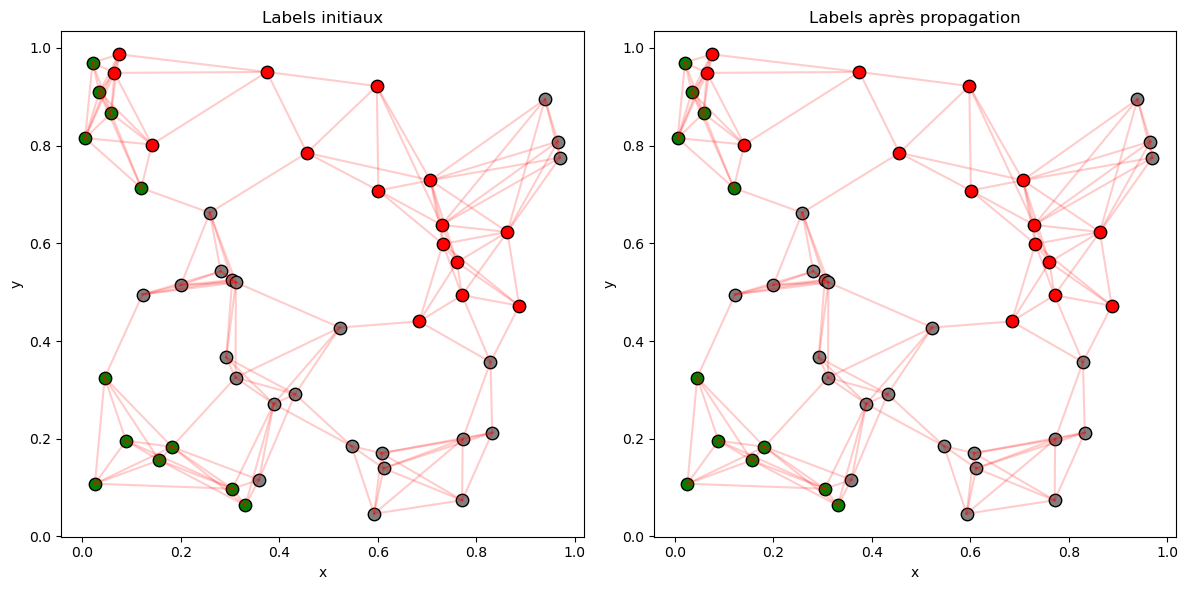

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Avant propagation
colors = np.array(['red', 'green', 'gray'])
for i in range(N):
    axes[0].scatter(X[i,0], X[i,1], color=colors[labels[i] if labels[i] != -1 else 2], s=80, edgecolor='black')
for edge in G_knn.edges():
    x0, y0 = X[edge[0]]
    x1, y1 = X[edge[1]]
    axes[0].plot([x0, x1], [y0, y1], 'r-', alpha=0.2)
axes[0].set_title('Labels initiaux')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
# Après propagation
for i in range(N):
    axes[1].scatter(X[i,0], X[i,1], color=colors[new_labels[i] if new_labels[i] != -1 else 2], s=80, edgecolor='black')
for edge in G_knn.edges():
    x0, y0 = X[edge[0]]
    x1, y1 = X[edge[1]]
    axes[1].plot([x0, x1], [y0, y1], 'r-', alpha=0.2)
axes[1].set_title('Labels après propagation')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
plt.tight_layout()
plt.show()

## 10. Propagation de labels sur plusieurs itérations
Appliquons la propagation de labels sur plusieurs itérations pour observer la diffusion sur le graphe k-NN.

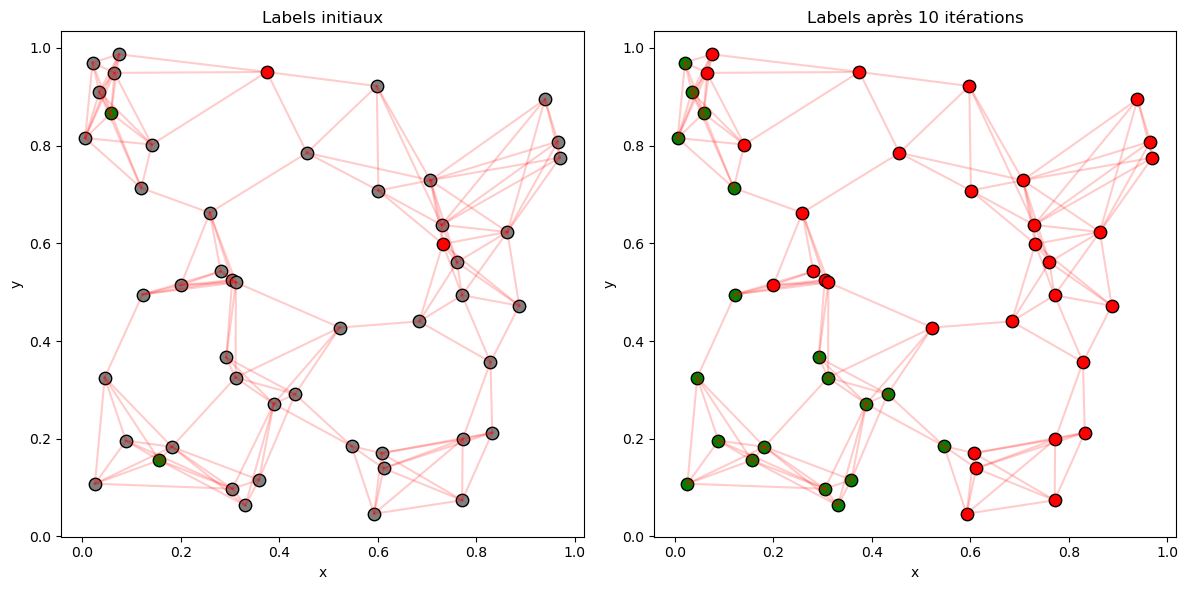

In [11]:
# Réinitialisation des labels initiaux
labels = np.full(N, -1)
labels[0] = 0
labels[1] = 0
labels[2] = 1
labels[3] = 1
# Propagation sur plusieurs itérations
num_iter = 10
labels_iter = [labels.copy()]
for it in range(num_iter):
    new_labels = labels.copy()
    for i in range(N):
        if labels[i] == -1:
            voisins = [j for j in G_knn.neighbors(i) if labels[j] != -1]
            if voisins:
                vals, counts = np.unique(labels[voisins], return_counts=True)
                new_labels[i] = vals[np.argmax(counts)]
    labels = new_labels
    labels_iter.append(labels.copy())
# Visualisation avant/après propagation (après num_iter itérations)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['red', 'green', 'gray'])
# Avant propagation
for i in range(N):
    axes[0].scatter(X[i,0], X[i,1], color=colors[labels_iter[0][i] if labels_iter[0][i] != -1 else 2], s=80, edgecolor='black')
for edge in G_knn.edges():
    x0, y0 = X[edge[0]]
    x1, y1 = X[edge[1]]
    axes[0].plot([x0, x1], [y0, y1], 'r-', alpha=0.2)
axes[0].set_title('Labels initiaux')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
# Après propagation
for i in range(N):
    axes[1].scatter(X[i,0], X[i,1], color=colors[labels_iter[-1][i] if labels_iter[-1][i] != -1 else 2], s=80, edgecolor='black')
for edge in G_knn.edges():
    x0, y0 = X[edge[0]]
    x1, y1 = X[edge[1]]
    axes[1].plot([x0, x1], [y0, y1], 'r-', alpha=0.2)
axes[1].set_title('Labels après {} itérations'.format(num_iter))
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
plt.tight_layout()
plt.show()

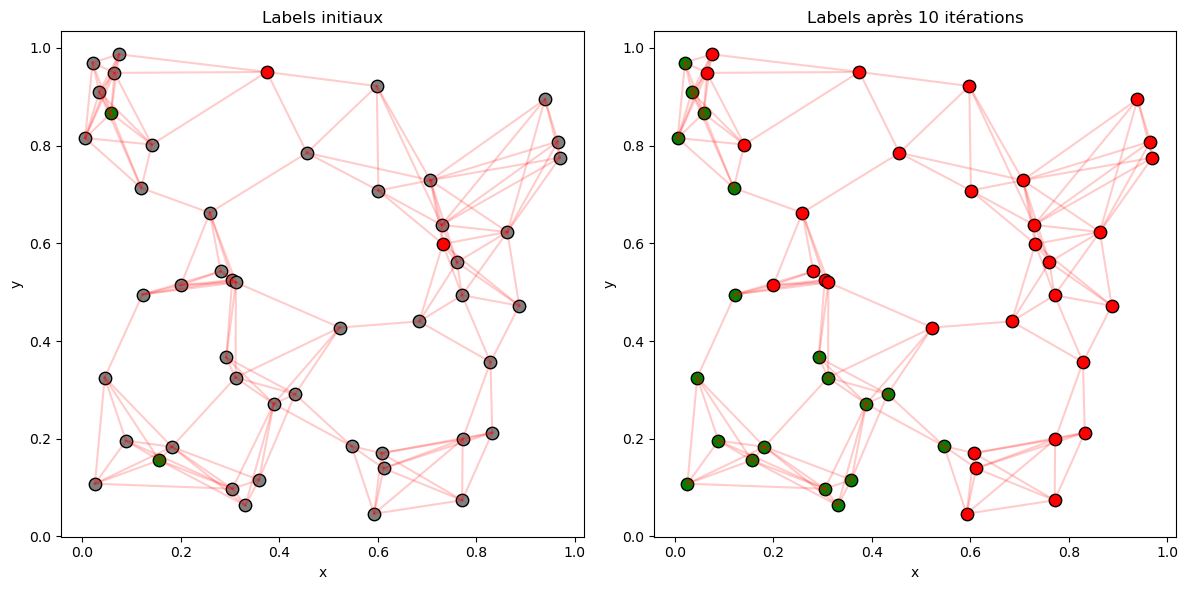

In [12]:
# Sauvegarde du résultat avant/après propagation dans un fichier PNG
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['red', 'green', 'gray'])
# Avant propagation
for i in range(N):
    axes[0].scatter(X[i,0], X[i,1], color=colors[labels_iter[0][i] if labels_iter[0][i] != -1 else 2], s=80, edgecolor='black')
for edge in G_knn.edges():
    x0, y0 = X[edge[0]]
    x1, y1 = X[edge[1]]
    axes[0].plot([x0, x1], [y0, y1], 'r-', alpha=0.2)
axes[0].set_title('Labels initiaux')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
# Après propagation
for i in range(N):
    axes[1].scatter(X[i,0], X[i,1], color=colors[labels_iter[-1][i] if labels_iter[-1][i] != -1 else 2], s=80, edgecolor='black')
for edge in G_knn.edges():
    x0, y0 = X[edge[0]]
    x1, y1 = X[edge[1]]
    axes[1].plot([x0, x1], [y0, y1], 'r-', alpha=0.2)
axes[1].set_title('Labels après {} itérations'.format(num_iter))
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
plt.tight_layout()
plt.savefig('labels_propagation_knn.png', dpi=300)
plt.show()